In [79]:
import pandas as pd

In [80]:
# Read dataset
df=pd.read_csv("https://raw.githubusercontent.com/tuyenhavan/Course_Data/main/electric_production.csv", index_col=0)
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [81]:
# Convert Datetime to index
df.index=pd.to_datetime(df.index)
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [82]:
# Select data from 1985 onwards
df=df.loc["1985-01-01":]

In [83]:
# Get decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
result=seasonal_decompose(df, model="multiplicative")

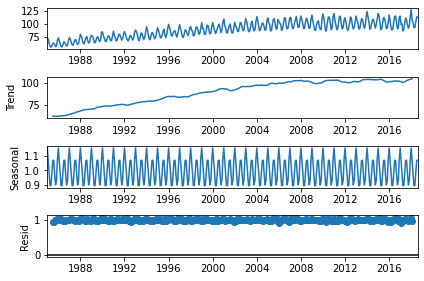

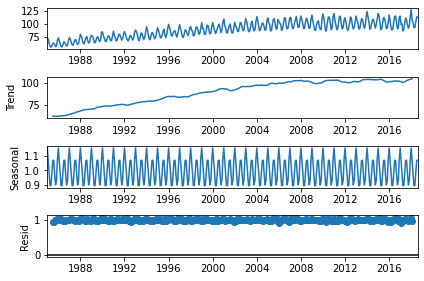

In [85]:
result.plot()

In [66]:
import matplotlib.pyplot as plt

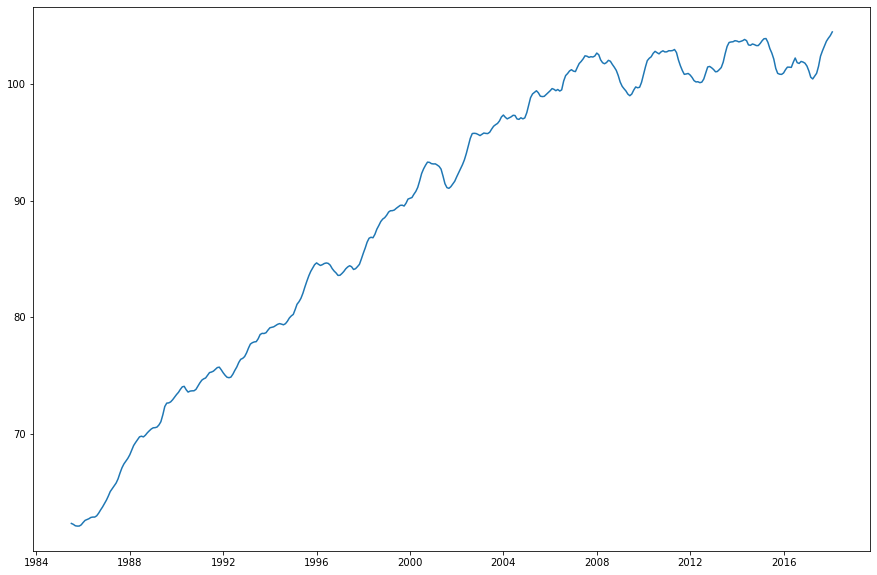

In [86]:
# Plotting  only trend
plt.figure(figsize=(15,10))
plt.plot(result.trend)

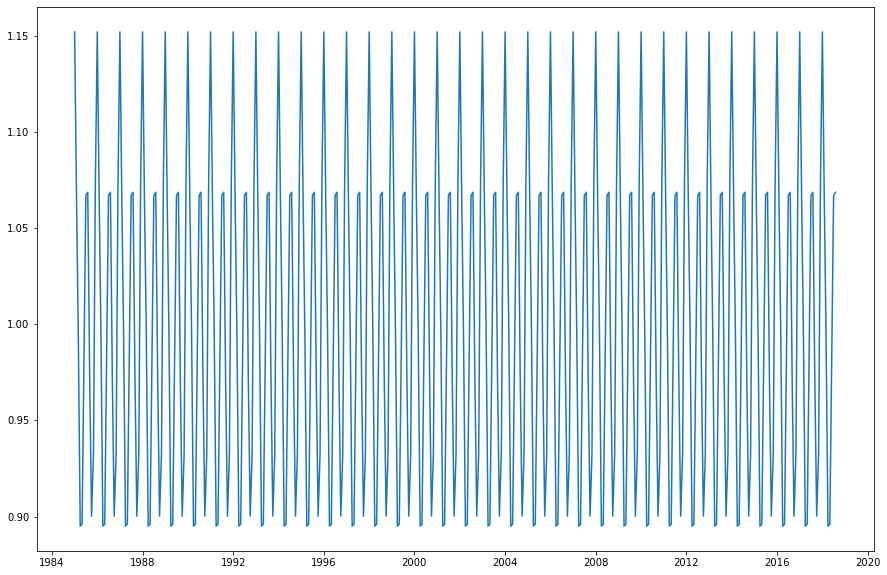

In [87]:
# Plotting only seasonal
plt.figure(figsize=(15,10))
plt.plot(result.seasonal)

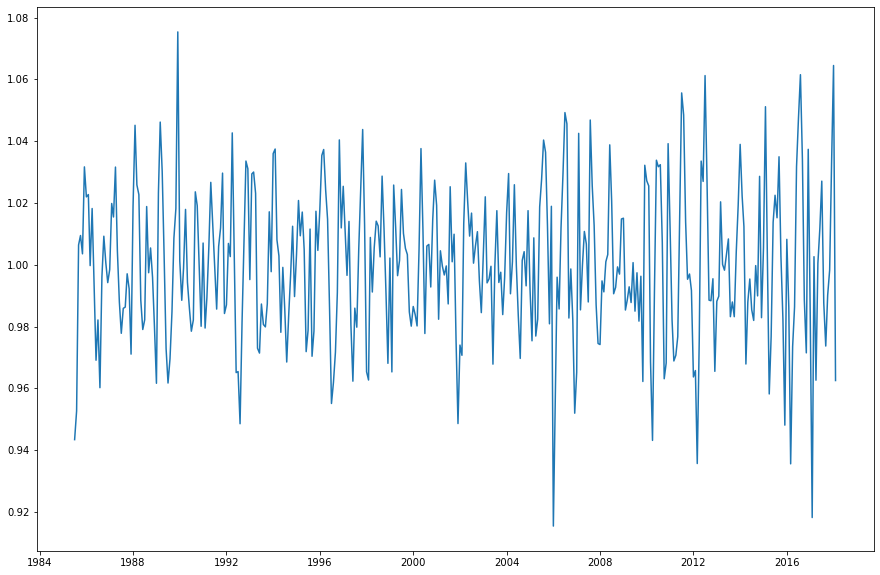

In [88]:
# Plotting only residuals
plt.figure(figsize=(15,10))
plt.plot(result.resid)

In [89]:
from pmdarima import auto_arima

In [90]:
stepwise_model=auto_arima(df, start_p=2, start_q=2, max_p=5, max_q=5,m=12,
                         start_P=1, seasonal=True, d=1, D=1, trace=1, error_action="ignore",
                         suppress_warnings=True, stepwise=True) # Dữ liệu theo ngày thì m=7, theo quý m=4, theo tuần m=52, theo năm m=12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1827.308, Time=1.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2055.116, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1980.491, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1876.298, Time=0.22 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1826.789, Time=0.97 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1826.372, Time=2.74 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1825.064, Time=2.96 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1812.125, Time=4.32 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1815.973, Time=2.63 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1810.891, Time=3.26 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1824.617, Time=2.92 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1815.075, Time=1.87 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1827.134, Time=0.92 sec
 ARIMA(0,1,2)(2,1,2)[12]

In [92]:
print(stepwise_model.aic())

1809.104450066309


In [93]:
train=df.loc["1985-01-01":"2010-12-01"]
test=df.loc["2011-01-01":]

In [94]:
# Cay mo hinh
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [95]:
# Du bao
forecast=stepwise_model.predict(n_periods=len(test))

In [96]:
forecast

array([118.56810225, 112.13489369, 102.19235046,  91.2197129 ,
        93.26604554, 104.80332713, 113.1442293 , 114.07839702,
       101.58313396,  93.22874494,  95.15891733, 112.35019756,
       117.47703749, 111.9000265 , 102.64356184,  92.16330407,
        93.60573504, 105.18843739, 113.1234546 , 114.15992602,
       101.74165232,  94.07198354,  95.7308178 , 112.732431  ,
       118.48161402, 112.38514704, 102.70221979,  92.1497945 ,
        93.65481991, 105.7430476 , 113.41474474, 114.31535166,
       101.84565378,  93.98458076,  95.88512882, 113.85529338,
       119.81930669, 113.10439415, 102.91798674,  92.18706911,
        93.89063638, 106.3627182 , 113.92917185, 114.69822773,
       102.16925448,  93.98889493,  96.14561051, 114.91981415,
       120.89752035, 113.82794489, 103.3536891 ,  92.50114221,
        94.34438209, 106.99121776, 114.54066422, 115.24056579,
       102.67800516,  94.29551693,  96.59255901, 115.75519893,
       121.69037084, 114.49684059, 103.92236406,  93.01

In [97]:
forecast=pd.DataFrame(forecast, index=test.index, columns=["prediction"])
forecast["Test"]=test
forecast

,prediction,Test
DATE,,
2011-01-01,118.568102,119.7459
2011-02-01,112.134894,107.4949
2011-03-01,102.192350,99.1833
2011-04-01,91.219713,89.3555
2011-05-01,93.266046,90.0892
...,...,...
2018-04-01,94.256386,93.1969
2018-05-01,96.166581,93.2673
2018-06-01,108.825201,103.6640


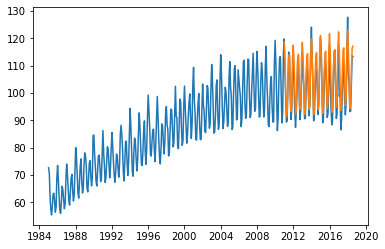

In [98]:
plt.plot(df, label="Energy Production")

plt.plot(forecast.prediction, label="prediction")

In [99]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test, forecast.prediction)

3.8849969361291246

In [106]:
# Predict next 12 months
forecast12=stepwise_model.predict(n_periods=len(test)+12)

Text(0.5, 1.0, 'Prediction for next 12 months')

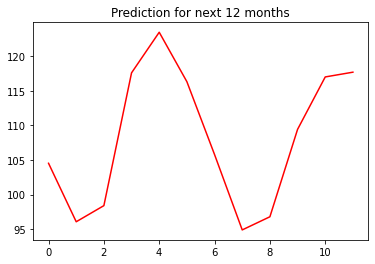

In [107]:
plt.plot(forecast12[len(test):], color="r")
plt.title("Prediction for next 12 months")

In [108]:
month=pd.date_range("2018-09-01","2019-08-01", freq="MS").strftime("%Y-%m-%d").tolist()
df_12month=pd.DataFrame({"Month":month, "Predict":forecast12[len(test):]})

In [109]:
df_12month

,Month,Predict
0,2018-09-01,104.521472
1,2018-10-01,96.059078
2,2018-11-01,98.393255
3,2018-12-01,117.608226
4,2019-01-01,123.483597
5,2019-02-01,116.325497
6,2019-03-01,105.780249
7,2019-04-01,94.878735
8,2019-05-01,96.781766
9,2019-06-01,109.428399
